# classification 

# 3. importing all libraries and Data collection and preprocessing

In [1]:
#############  1. Import all necessary libraries ###########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns  # for better visualization of confusion matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [2]:
################## 2. loading the mushroom dataset #####################
df = pd.read_excel('C:/Users/subas/Downloads/Mushroom.xlsx')
print(df.head(2))

  Class Cap-shape Cap-surface Cap-color Bruises Odor Gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   

  Gill-spacing Gill-size Gill-color  ... Stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   

  Stalk-color-above-ring Stalk-color-below-ring Veil-type Veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   

  Ring-number Ring-type Spore-print-color Population Habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  

[2 rows x 23 columns]


D:\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
############## 3. check for any null values in dataset################
Mushroom=df.info()
######## Check for columns with missing values ######################
missing_values = df.isnull().sum()
print("Number of missing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap-shape                 8124 non-null   object
 2   Cap-surface               8124 non-null   object
 3   Cap-color                 8124 non-null   object
 4   Bruises                   8124 non-null   object
 5   Odor                      8124 non-null   object
 6   Gill-attachment           8124 non-null   object
 7   Gill-spacing              8124 non-null   object
 8   Gill-size                 8124 non-null   object
 9   Gill-color                8124 non-null   object
 10  Stalk-shape               8124 non-null   object
 11  Stalk-root                8124 non-null   object
 12  Stalk-surface-above-ring  8124 non-null   object
 13  Stalk-surface-below-ring  8124 non-null   object
 14  Stalk-color-above-ring  

In [4]:
######### looking at dataframe descrption ###############
df.describe()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
############# display number of samples on each class #################
df['Class'].value_counts()

e    4208
p    3916
Name: Class, dtype: int64

In [6]:
# The data is categorical so we’ll use LabelEncoder to convert it to ordinal.
# LabelEncoder converts each value in a column to a number.
# This approach requires the category column to be of ‘category’ datatype. 
# By default, a non-numerical column is of ‘object’ datatype. 
# From the df.info() method, we saw that our columns are of ‘object’ datatype.
# So we will have to change the type to ‘category’ before using this approach.

df = df.astype('category')
df.dtypes

Class                       category
Cap-shape                   category
Cap-surface                 category
Cap-color                   category
Bruises                     category
Odor                        category
Gill-attachment             category
Gill-spacing                category
Gill-size                   category
Gill-color                  category
Stalk-shape                 category
Stalk-root                  category
Stalk-surface-above-ring    category
Stalk-surface-below-ring    category
Stalk-color-above-ring      category
Stalk-color-below-ring      category
Veil-type                   category
Veil-color                  category
Ring-number                 category
Ring-type                   category
Spore-print-color           category
Population                  category
Habitat                     category
dtype: object

In [7]:
############### Initialize Label encoder #############

# Label encoding is a common technique used in machine learning to transform
# categorical data into numerical data. Machine learning models, in general, 
# can't handle categorical (especially string based) input. 
# So, LabelEncoder in Scikit-Learn library converts each class under specified
# feature to a numerical value.


le = LabelEncoder()

# Convert each column category value to ordinal
for column in df.columns:
    df[column] = le.fit_transform(df[column])    
df.head()



,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
# from the above figure we can see that veil-type has only one unique value and 
# hence won't contribute anything to the data. So we can safely remove it.

df = df.drop(["Veil-type"],axis=1)

# 4. Exploratory Data Analysis (EDA)

In [9]:
##################### Using corelation matrix to determine dependability #####
# Compute correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)


                             Class  Cap-shape  Cap-surface  Cap-color  \
Class                     1.000000   0.052951     0.178446  -0.031384   
Cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
Cap-surface               0.178446  -0.050454     1.000000  -0.019402   
Cap-color                -0.031384  -0.048203    -0.019402   1.000000   
Bruises                  -0.501530  -0.035374     0.070228  -0.000764   
Odor                     -0.093552  -0.021935     0.045233  -0.387121   
Gill-attachment           0.129200   0.078865    -0.034180   0.041436   
Gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
Gill-size                 0.540024   0.054050     0.208100  -0.169464   
Gill-color               -0.530566  -0.006039    -0.161017   0.084659   
Stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
Stalk-root               -0.379361   0.030191    -0.126245   0.321274   
Stalk-surface-above-ring -0.334593  -0.030417     0

In [10]:

# Threshold for removing correlated variables
# we already have 22 features so we need to drop down the features to less 
# so we use less threshold .
threshold = 0.5

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold 
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

print(df.head())

   Class  Cap-shape  Cap-surface  Cap-color  Bruises  Odor  Gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   Gill-spacing  Stalk-shape  Stalk-root  Stalk-surface-above-ring  \
0             0            0           3                         2   
1             0            0           2                         2   
2             0            0           2                         2   
3             0            0           3                         2   
4             1            1           3                         2   

   Stalk-surface-below-ring  Stalk-color-above-ring  Stalk-color-below-ring  \
0                        

C:\Users\subas\AppData\Local\Temp\ipykernel_14948\2418277514.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [11]:

# Assume 'class' is the label column
X = df.drop(['Class'], axis=1)  # Features
y = df['Class']  # class variable


# 5. build, trian, test, validate, evaluate the model and plot the result.

Cross-Validation Accuracy Scores [0.84246154 1.         1.         1.         0.78571429]
Accuracy: 1.0


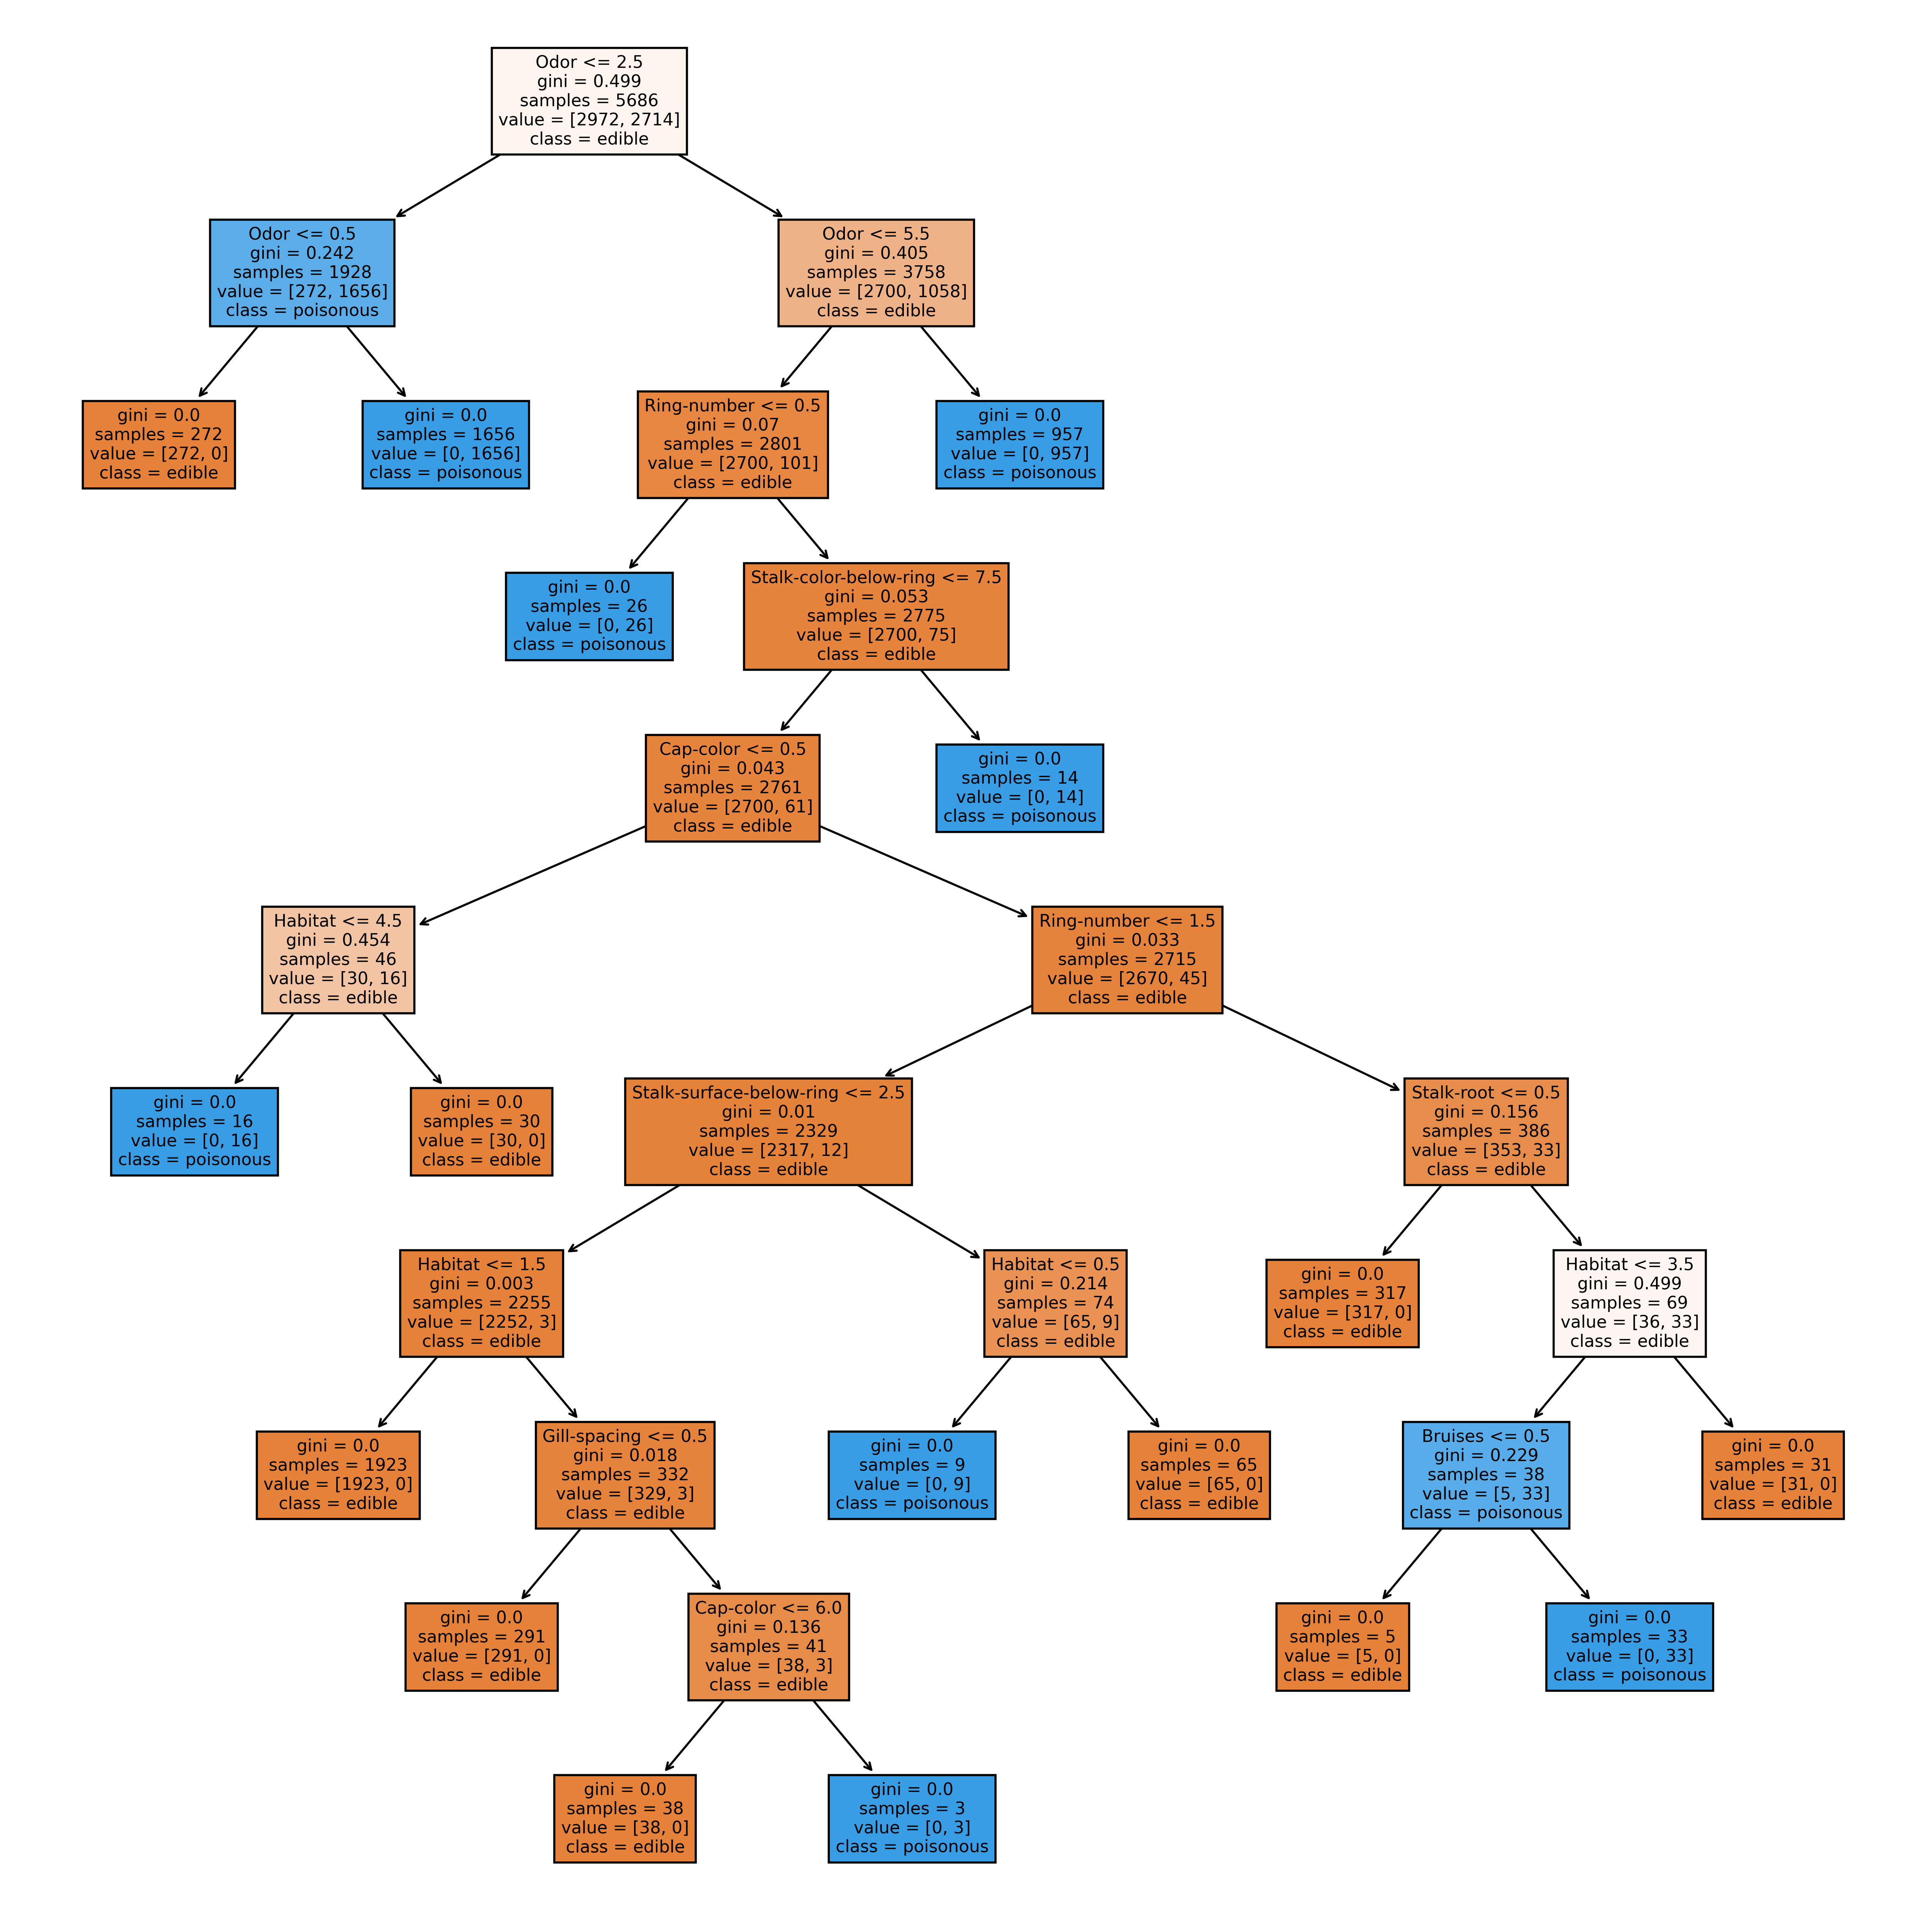

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Ring-number,Population,Habitat
0,1,5,2,4,1,6,1,0,0,3,2,2,7,7,1,3,5
1,0,5,2,9,1,0,1,0,0,2,2,2,7,7,1,2,1


In [12]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# build the model using Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train the model using Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# validate the mode: Perform 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)


# Test the model: Predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate the model: Print model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Plot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=400)
plot_tree(clf, 
          feature_names = X.columns, 
          class_names=['edible', 'poisonous'], # assuming class 0 is 'edible' and 1 is 'poisonous'
          filled = True)
plt.show()


df.head(2)








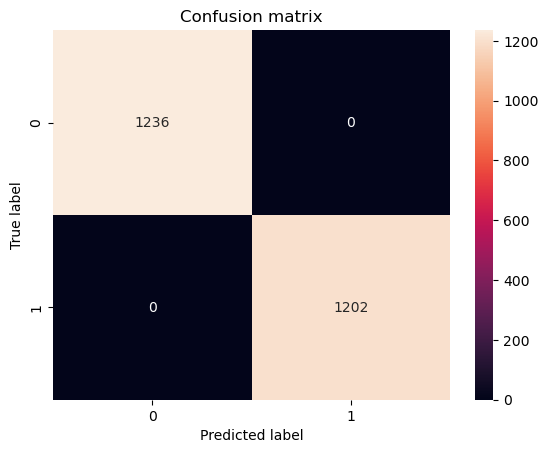

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [13]:
### model evaluation using confusion matrix and classification report ############

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred))

In [14]:
######### Model testing  ######################
# Predict the classes of the first five samples from the test set
y_pred_first_five = clf.predict(X_test[:5])

# Print the actual classes
print('Actual classes:', y_test[:5].values)

# Print the predicted classes
print('Predicted classes:', y_pred_first_five)

Actual classes: [0 1 1 1 0]
Predicted classes: [0 1 1 1 0]
